# [WIP] Phash with umap for visualization

In [1]:
from src.phishIRISData import PhishIRISDataset
from src.config import config

import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'umap'

In [ ]:
train_dataset = PhishIRISDataset(data_dir=config.PHISHIRIS_DL_DATASET_DIR, split="train", preprocess=False)

/Users/marcinjarczewski/src/phish-target-recognition/.venv/lib/python3.12/site-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)
/Users/marcinjarczewski/src/phish-target-recognition/.venv/lib/python3.12/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


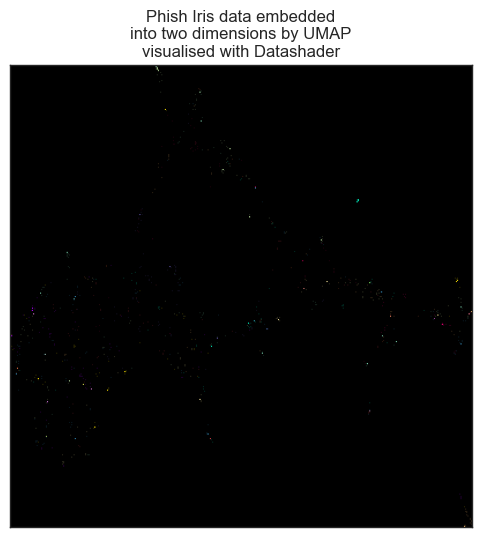

In [2]:
import pandas as pd
import datashader as ds
import datashader.utils as utils
import datashader.transfer_functions as tf
import seaborn as sns

sns.set(context="paper", style="white")

reducer = umap.UMAP(random_state=42)
embedding = reducer.fit_transform([hasher.string_to_vector(x) for x in data])

df = pd.DataFrame(embedding, columns=("x", "y"))
df["class"] = pd.Series([hash_to_company[x] for x in data], dtype="category")

pal = [
    "#9e0142",  # original
    "#d8434e",  # original
    "#f67a49",  # original
    "#fdbf6f",  # original
    "#feeda1",  # original
    "#f1f9a9",  # original
    "#bfe5a0",  # original
    "#74c7a5",  # original
    "#378ebb",  # original
    "#5e4fa2",  # original
    "#ad00ff",  # new: vibrant purple
    "#00ffcc",  # new: bright cyan
    "#ff0080",  # new: vivid pink
    "#ffe600",  # new: neon yellow
]

color_key = {d: c for d, c in enumerate(pal)}

cvs = ds.Canvas(plot_width=400, plot_height=400)
agg = cvs.points(df, "x", "y", ds.count_cat("class"))
img = tf.shade(agg, color_key=color_key, how="eq_hist")

utils.export_image(img, filename="phish-iris", background="black")

image = plt.imread("phish-iris.png")
fig, ax = plt.subplots(figsize=(6, 6))
plt.imshow(image)
plt.setp(ax, xticks=[], yticks=[])
plt.title(
    "Phish Iris data embedded\n"
    "into two dimensions by UMAP\n"
    "visualised with Datashader",
    fontsize=12,
)

plt.show()

/Users/marcinjarczewski/src/phish-target-recognition/.venv/lib/python3.12/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


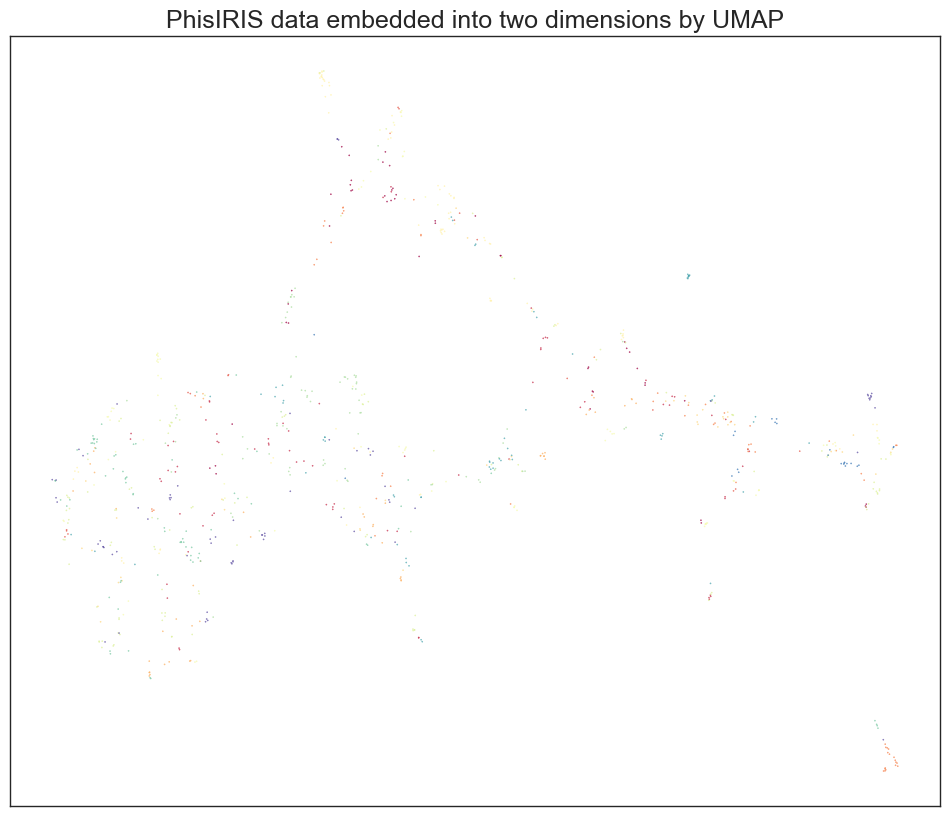

In [3]:
reducer = umap.UMAP(random_state=42)
tmp_data, cls_data = (
    [hasher.string_to_vector(x) for x in data],
    [hash_to_company[x] for x in data],
)
embedding = reducer.fit_transform(tmp_data)

fig, ax = plt.subplots(figsize=(12, 10))
plt.scatter(embedding[:, 0], embedding[:, 1], c=cls_data, cmap="Spectral", s=0.1)
plt.setp(ax, xticks=[], yticks=[])
plt.title("PhisIRIS data embedded into two dimensions by UMAP", fontsize=18)

plt.show()